# Задание

1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

2. Подберите параметры модели SARIMAX для этого ряда.

3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

4. Возмите вариант 1 или 2 
    - Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
    - Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19  (по любой стране кроме Китая на дневных графиках )


5. Оцените результат моделирования

6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии  на основе AR I MA.

### Задача 1--3

Импортируем библиотеки

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns

import os

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

Прочитаем csv-файл

In [2]:
cons = pd.read_csv('my_PJME_MW.csv', index_col=[0], parse_dates=[0])
cons.head()

,Time,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,,
2002-01-01,01:00:00,30393.0,2002,1,1,1,1,1,1,1,1,0,0
2002-01-01,02:00:00,29265.0,2002,1,1,1,1,1,1,2,1,0,0
2002-01-01,03:00:00,28357.0,2002,1,1,1,1,1,1,3,1,0,0
2002-01-01,04:00:00,27899.0,2002,1,1,1,1,1,1,4,1,0,0
2002-01-01,05:00:00,28057.0,2002,1,1,1,1,1,1,5,1,0,0


Произведем ресемплинг

In [3]:
m_cons=cons.resample('M').mean()
m_cons.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


Построим модели автокорреляции и частичной автокорреляции (ACF, PACF) с лагом 12 месяцев

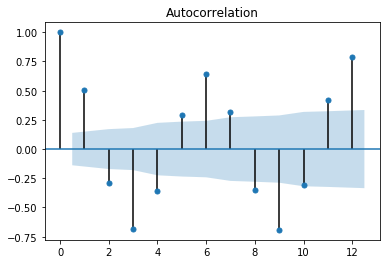

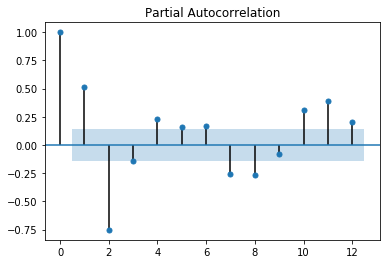

In [4]:
sm.graphics.tsa.plot_acf(m_cons['PJME_MW'].values, lags=12)
plt.show()

sm.graphics.tsa.plot_pacf(m_cons['PJME_MW'].values, lags=12)
plt.show()

При лаге 3, 6, 9 наблюдается наибольшие значения автокорреляции, также форма полученной кривой имеет периодический вид, что говорит о сезонности данного ряда  

Произведем подбор коэффициентов ARIMA при помощи сеточного поиска

In [5]:
import itertools

p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))


p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m_cons['PJME_MW'].values,order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except Exception as E:
            print(E)

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4699.195491264933
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4290.040464872278
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3987.1764435563705
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3372.7214168798077
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:3143.0669287152464
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2904.7464905692823
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4534.039921069851
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4225.338467513022
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3947.281069560797
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3330.6866857595214
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:3103.4708140327884
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2869.803852147408
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4478.921088805258
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3776.19955328393
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3924.804408772281
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3315.6786725106726
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:3087.848067887178
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2854.2202541760735
ARIMA(0, 1, 0)x(0, 0,

C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 2, 12)3 - AIC:3277.9857868022245
ARIMA(1, 0, 0)x(0, 1, 0, 12)3 - AIC:3350.4034264431248
ARIMA(1, 0, 0)x(0, 1, 1, 12)3 - AIC:3117.3003840103283
ARIMA(1, 0, 0)x(0, 1, 2, 12)3 - AIC:2877.8527152903916
ARIMA(1, 0, 1)x(0, 0, 0, 12)3 - AIC:3753.0410598169674
ARIMA(1, 0, 1)x(0, 0, 1, 12)3 - AIC:3472.9127622104083


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 2, 12)3 - AIC:3282.9607428767513
ARIMA(1, 0, 1)x(0, 1, 0, 12)3 - AIC:3332.641810034511
ARIMA(1, 0, 1)x(0, 1, 1, 12)3 - AIC:3093.7090130307706
ARIMA(1, 0, 1)x(0, 1, 2, 12)3 - AIC:2862.8868070662074
ARIMA(1, 0, 2)x(0, 0, 0, 12)3 - AIC:3694.421707822881
ARIMA(1, 0, 2)x(0, 0, 1, 12)3 - AIC:3429.840870628531
ARIMA(1, 0, 2)x(0, 0, 2, 12)3 - AIC:3648.737974618402
ARIMA(1, 0, 2)x(0, 1, 0, 12)3 - AIC:3317.194753949482
ARIMA(1, 0, 2)x(0, 1, 1, 12)3 - AIC:3063.0269812601855
ARIMA(1, 0, 2)x(0, 1, 2, 12)3 - AIC:2844.1368266413147
ARIMA(1, 1, 0)x(0, 0, 0, 12)3 - AIC:3771.460929304396
ARIMA(1, 1, 0)x(0, 0, 1, 12)3 - AIC:3469.2479605840713
ARIMA(1, 1, 0)x(0, 0, 2, 12)3 - AIC:3229.6887245815788
ARIMA(1, 1, 0)x(0, 1, 0, 12)3 - AIC:3387.0280409419893
ARIMA(1, 1, 0)x(0, 1, 1, 12)3 - AIC:3117.615848380787
ARIMA(1, 1, 0)x(0, 1, 2, 12)3 - AIC:2894.4623409348505
ARIMA(1, 1, 1)x(0, 0, 0, 12)3 - AIC:3735.4704522308193
ARIMA(1, 1, 1)x(0, 0, 1, 12)3 - AIC:3438.838263171106
ARIMA(1, 1, 1)x(0,

C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 2, 2)x(0, 1, 1, 12)3 - AIC:3078.15816628859
ARIMA(1, 2, 2)x(0, 1, 2, 12)3 - AIC:2867.318249183261
ARIMA(2, 0, 0)x(0, 0, 0, 12)3 - AIC:3772.653128854749
ARIMA(2, 0, 0)x(0, 0, 1, 12)3 - AIC:3502.5118798289977
ARIMA(2, 0, 0)x(0, 0, 2, 12)3 - AIC:3705.391475930771
ARIMA(2, 0, 0)x(0, 1, 0, 12)3 - AIC:3333.6012795642027
ARIMA(2, 0, 0)x(0, 1, 1, 12)3 - AIC:3118.8060815716635
ARIMA(2, 0, 0)x(0, 1, 2, 12)3 - AIC:2879.796207928668
ARIMA(2, 0, 1)x(0, 0, 0, 12)3 - AIC:3791.2099876000625
ARIMA(2, 0, 1)x(0, 0, 1, 12)3 - AIC:3497.302004605443
ARIMA(2, 0, 1)x(0, 0, 2, 12)3 - AIC:3241.3695618729207
ARIMA(2, 0, 1)x(0, 1, 0, 12)3 - AIC:3334.246790477041
ARIMA(2, 0, 1)x(0, 1, 1, 12)3 - AIC:3085.4009701230534


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 1, 2, 12)3 - AIC:2869.312515186798
ARIMA(2, 0, 2)x(0, 0, 0, 12)3 - AIC:3674.783920556766
ARIMA(2, 0, 2)x(0, 0, 1, 12)3 - AIC:3404.2981721538927
ARIMA(2, 0, 2)x(0, 0, 2, 12)3 - AIC:3586.5710459148186
ARIMA(2, 0, 2)x(0, 1, 0, 12)3 - AIC:3318.085391735577
ARIMA(2, 0, 2)x(0, 1, 1, 12)3 - AIC:3072.03336934779


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 2)x(0, 1, 2, 12)3 - AIC:2846.1178459084995
ARIMA(2, 1, 0)x(0, 0, 0, 12)3 - AIC:3672.885958969931
ARIMA(2, 1, 0)x(0, 0, 1, 12)3 - AIC:3446.631649749739
ARIMA(2, 1, 0)x(0, 0, 2, 12)3 - AIC:3214.540836366552
ARIMA(2, 1, 0)x(0, 1, 0, 12)3 - AIC:3342.0152219982883
ARIMA(2, 1, 0)x(0, 1, 1, 12)3 - AIC:3098.5456425855655
ARIMA(2, 1, 0)x(0, 1, 2, 12)3 - AIC:2877.364778768903
ARIMA(2, 1, 1)x(0, 0, 0, 12)3 - AIC:3565.0420219548614
ARIMA(2, 1, 1)x(0, 0, 1, 12)3 - AIC:3339.3338918450113
ARIMA(2, 1, 1)x(0, 0, 2, 12)3 - AIC:3127.0773805627346
ARIMA(2, 1, 1)x(0, 1, 0, 12)3 - AIC:3344.007126256849
ARIMA(2, 1, 1)x(0, 1, 1, 12)3 - AIC:3074.298709956865
ARIMA(2, 1, 1)x(0, 1, 2, 12)3 - AIC:2845.39102843625
ARIMA(2, 1, 2)x(0, 0, 0, 12)3 - AIC:3543.50284063614
ARIMA(2, 1, 2)x(0, 0, 1, 12)3 - AIC:3291.471946784545
ARIMA(2, 1, 2)x(0, 0, 2, 12)3 - AIC:3082.1409393752865
ARIMA(2, 1, 2)x(0, 1, 0, 12)3 - AIC:3326.303955004778
ARIMA(2, 1, 2)x(0, 1, 1, 12)3 - AIC:3045.0384407892666


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 2)x(0, 1, 2, 12)3 - AIC:2827.865852716379
ARIMA(2, 2, 0)x(0, 0, 0, 12)3 - AIC:3796.408055652012
ARIMA(2, 2, 0)x(0, 0, 1, 12)3 - AIC:3543.2667037975025
ARIMA(2, 2, 0)x(0, 0, 2, 12)3 - AIC:3301.5056771867994
ARIMA(2, 2, 0)x(0, 1, 0, 12)3 - AIC:3417.76383684824
ARIMA(2, 2, 0)x(0, 1, 1, 12)3 - AIC:3172.3478517501753
ARIMA(2, 2, 0)x(0, 1, 2, 12)3 - AIC:2951.1044003930983
ARIMA(2, 2, 1)x(0, 0, 0, 12)3 - AIC:3713.1103461324556
ARIMA(2, 2, 1)x(0, 0, 1, 12)3 - AIC:3432.293177987298
ARIMA(2, 2, 1)x(0, 0, 2, 12)3 - AIC:3202.526626353915
ARIMA(2, 2, 1)x(0, 1, 0, 12)3 - AIC:3379.47735843567
ARIMA(2, 2, 1)x(0, 1, 1, 12)3 - AIC:3095.259447008848
ARIMA(2, 2, 1)x(0, 1, 2, 12)3 - AIC:2850.116083201886
ARIMA(2, 2, 2)x(0, 0, 0, 12)3 - AIC:3558.5022346571445
ARIMA(2, 2, 2)x(0, 0, 1, 12)3 - AIC:3335.3208721325864
ARIMA(2, 2, 2)x(0, 0, 2, 12)3 - AIC:3121.4082169479098
ARIMA(2, 2, 2)x(0, 1, 0, 12)3 - AIC:3359.0733970968367


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 1, 1, 12)3 - AIC:3067.2427628104124


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 2, 2)x(0, 1, 2, 12)3 - AIC:2855.5356066823124


Оптимальными являются векторы ARIMA(0, 1, 2)x(0, 1, 2, 12), имеющие AIC:2845.0776485486313

Произведем прогноз на 12 месяцев

In [6]:
N1 =0
N2=24
nforecast = N2+12

mod = sm.tsa.statespace.SARIMAX(m_cons['PJME_MW'].values[N1:-N2],order=[0,1,2],
                                seasonal_order=[0,1,2,12] ,
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_opt = mod.fit()
print('AIC:{}',results_opt.aic)

AIC:{} 2405.5124313003453


In [7]:
predict_ = results_opt.get_prediction(end=results_opt.nobs + nforecast)

Построим графики

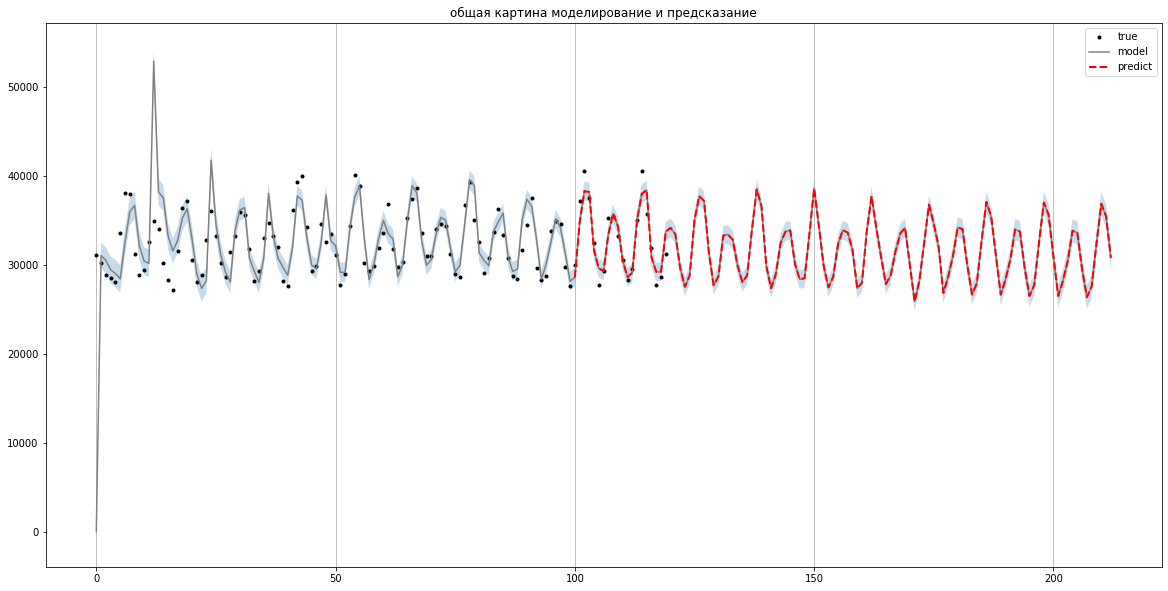

In [42]:

idx = np.arange(len(predict_.predicted_mean))
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(20,10))
ax.xaxis.grid()
ax.plot(m_cons['PJME_MW'].values[:120], 'k.',label='true')

# 
ax.plot(idx, predict_.predicted_mean, 'gray',label = 'model')
ax.plot(idx[100:], predict_.predicted_mean[100:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[0:, 0], predict_ci[0:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

<b>Вывод</b>:Полученная прогноз повторил ход движения кривой

### Задача 4--6

Выбран вариант 1: Построим ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)

Импортируем csv-файл

In [9]:
brent = pd.read_csv('my_BRENT2019.csv', index_col=[0], parse_dates=[0])
brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-01,76.37,2010,9,1,3,244,35,2,0,0,0
2010-09-02,76.89,2010,9,2,3,245,35,3,0,0,0
2010-09-03,76.57,2010,9,3,3,246,35,4,0,0,0
2010-09-04,76.62,2010,9,4,3,247,35,5,0,0,0
2010-09-05,76.63,2010,9,5,3,248,35,6,0,1,0


Произведем ресемплинг в недельный ряд

In [10]:
w_brent=brent.resample('W').mean()
w_brent.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Построим ACF и RACF модели

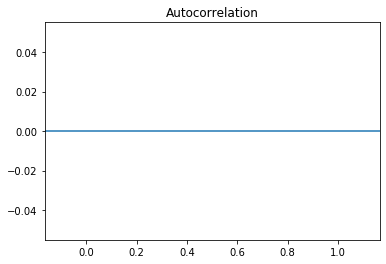

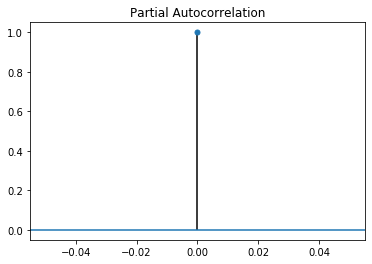

In [43]:
sm.graphics.tsa.plot_acf(w_brent['Значение'].values, lags=12)
plt.show()

sm.graphics.tsa.plot_pacf(w_brent['Значение'].values, lags=12)
plt.show()

Модели имеют нулевые значения, это говорит нам о том, что значения никак между собой не связаны

Подберем коэффициенты ARIMA ряда, при коэффициентах сезонности, равные 0

In [45]:
import itertools
# Определим p, d и q в диапазоне 0-3
d = [0,1]
p = [0,1] 
q = range(0, 7)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона


for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(np.log(w_brent['Значение'].values[:-200]),
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except Exception as E:
        print(E)

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:-74.7277362080455
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:-409.19342765496145


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:-629.9296059521693
ARIMA(0, 0, 3)x[0, 0, 0, 0] - AIC:-532.0401837201945
ARIMA(0, 0, 4)x[0, 0, 0, 0] - AIC:-595.1033595305832


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 5)x[0, 0, 0, 0] - AIC:-845.0687962398573


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 6)x[0, 0, 0, 0] - AIC:-921.6026313374718
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:-1138.2415823961471


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:-1158.2445207934709
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:-1150.6899510111687
ARIMA(0, 1, 3)x[0, 0, 0, 0] - AIC:-1146.890588288261


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 4)x[0, 0, 0, 0] - AIC:-1141.3450778372376


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 5)x[0, 0, 0, 0] - AIC:-1134.3413641161947
ARIMA(0, 1, 6)x[0, 0, 0, 0] - AIC:-1127.0644945248132
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:-1143.720176817907


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:-1164.2023840977167


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:-1156.7003078483206


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 3)x[0, 0, 0, 0] - AIC:-1152.5089330241015
ARIMA(1, 0, 4)x[0, 0, 0, 0] - AIC:-1146.437992525936
ARIMA(1, 0, 5)x[0, 0, 0, 0] - AIC:-1140.167675990614


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 6)x[0, 0, 0, 0] - AIC:-1133.1217139722753
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:-1164.0739871650876
ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:-1156.9330902127708
ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:-1149.7855108141332


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 3)x[0, 0, 0, 0] - AIC:-1144.8318197507028
ARIMA(1, 1, 4)x[0, 0, 0, 0] - AIC:-1138.9723499509905


C:\Program Files\Python37\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 5)x[0, 0, 0, 0] - AIC:-1133.3550724121974
ARIMA(1, 1, 6)x[0, 0, 0, 0] - AIC:-1125.3568980435439


Оптимальными являются векторы ARIMA(1, 0, 1)x[0, 0, 0, 0], имеющие AIC:-1164.2023840977167

Произведем прогноз ряда и посторим результат

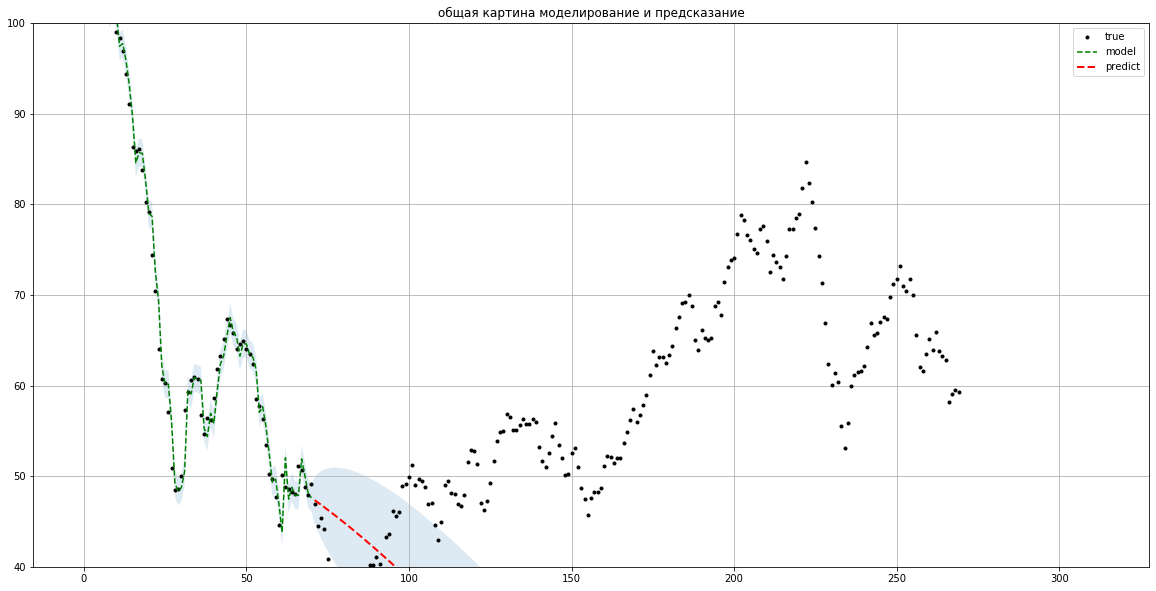

In [49]:
N3=200
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)   

idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)


fig, ax = plt.subplots(figsize=(20,10))
ax.plot(w_brent['Значение'].values[N3:], 'k.',label='true')
plt.ylim([40,100])
plt.grid()
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], '--g',label='model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2,label = 'predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.15)
plt.legend()

ax.set(title='общая картина моделирование и предсказание');

<b>Вывод</b>: полученная модель предсказала снижение цены в краткосрочном периоде, но не её ход в целом

<b>Общий вывод</b>: модель ARIMA лучше всего подходит для сезонных, циклических временных рядов, т.е. там, где выражена автокорреляция между своими значениями внутри ряда